<a href="https://colab.research.google.com/github/namratabalwani/contribute-practice/blob/main/Project5_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth=8000)

In [10]:
I1 = cv.imread('/content/drive/My Drive/DIP-ESE558/Project 5/dance2gray.jpg')

M, N, C = I1.shape
I2 = rgb2gray(I1)
I2 = np.double(I2) / 255.0
g = np.zeros((M, N))
g1 = np.zeros((M, N))

In [11]:
ksize = 5
sigma = 3.0
h1 = np.zeros((2*ksize+1))

normalization_factor = 0.0
for s in range(-ksize, ksize+1):
    h1[s+ksize] = np.exp(-(s**2)/(2*sigma**2))
    normalization_factor += h1[s+ksize]

h1 = np.double(h1) / normalization_factor

for m in range(M):
    for n in range(N):
        summ = 0.0
        for p in range(-ksize, ksize+1):
            if m-p < 0:
                k = abs(m-p)
            elif m-p > M-1:
                k = 2*M-2-(m-p)
            else:
                k = m-p
            for q in range(-ksize, ksize+1):
                if n-q < 0:
                    l = abs(n-q)
                elif n-q > N-1:
                    l = 2*N-2-(n-q)
                else:
                    l = n-q
                summ += h1[p+ksize] * I2[k, l]
        g1[m, n] = summ

h2 = np.transpose(h1)

for m in range(M):
    for n in range(N):
        summ = 0.0
        for p in range(-ksize, ksize+1):
            if m-p < 0:
                k = abs(m-p)
            elif m-p > M-1:
                k = 2*M-2-(m-p)
            else:
                k = m-p
            for q in range(-ksize, ksize+1):
                if n-q < 0:
                    l = abs(n-q)
                elif n-q > N-1:
                    l = 2*N-2-(n-q)
                else:
                    l = n-q
                summ += g1[k, l] * h2[q+ksize]
        g[m, n] = summ

maximum_brightness = np.max(g)


cv.waitKey(0)
cv.destroyAllWindows()

Original grayscale image


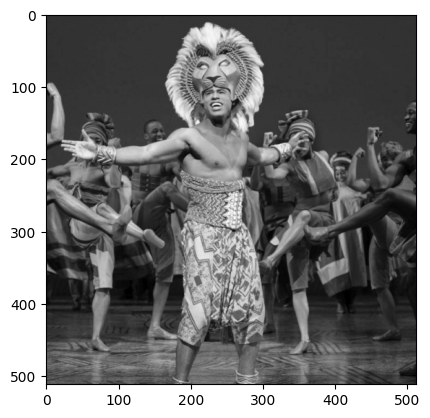

Blurred grayscale image using Gaussian PSF


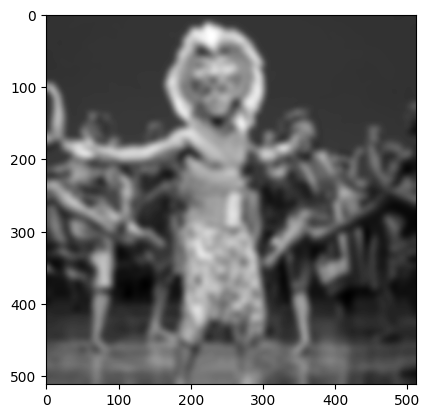

In [14]:
print("Original grayscale image")
I1 = cv.cvtColor(I1, cv.COLOR_BGR2RGB)
pixels = np.array(I1)
plt.imshow(pixels)
plt.show()

print("Blurred grayscale image using Gaussian PSF")
pixels = np.array(g)
plt.imshow(pixels, cmap='gray')
plt.show()
